In [65]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
def f(x):
    return 3*x**2 +6*x + 10

In [67]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

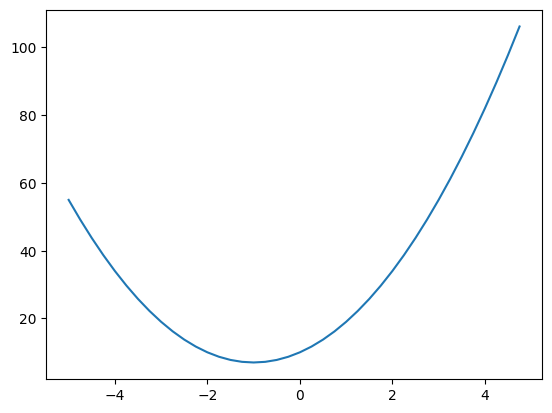

In [68]:
plt.plot(xs, ys)

In [69]:
# plt.plot(xs, ys)
h = 0.000001
x = -2.
print(f'{x=} \n{f(x)=}\n{f(x+h)=}')
print(f'{(f(x+h) - f(x))/h=}')

x=-2.0 
f(x)=10.0
f(x+h)=9.999994000003
(f(x+h) - f(x))/h=-5.999997000571966


In [70]:
# getting slope for more complex functions
a = 2.
b = -3.0
c = 10.

def f1(a, b , c):
    return a*b + c

d = f1(a, b, c)
print('default', d)

default 4.0


In [71]:
# slope of f1 wrt a
h = 0.0001

d1 = f1(a+h, b, c)
print(f'{d1}')
print('slope wrt a', (d1 - d)/h) # should be -3 if we take derivative by hand

d2 = f1(a, b+h, c)
print(f'{d2}')
print('slope wrt b', (d2 - d)/h) # should be 2 if we take derivative by hand

d3 = f1(a, b, c+h)
print(f'{d3}')
print('slope wrt c', (d3 - d)/h) # should be 1 if we take derivative by hand


3.999699999999999
slope wrt a -3.000000000010772
4.0002
slope wrt b 2.0000000000042206
4.0001
slope wrt c 0.9999999999976694


In [72]:
class Value:
    def __init__(self, data, label='', _children=(), _op='') -> None:
        self.data = data
        self._prev = set(_children) #it's for setting points to objects which change the value of this object
        self._op = _op
        self.label = label
        self.grad = 0.0
    
    def __repr__(self) -> str:
        return f'Value({self.data})'
    
    def __add__(self, other):
        return Value(self.data + other.data,f"{self.label} + {other.label}", (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, f"{self.label} * {other.label}", (self, other), '*')

In [73]:
print(Value(4))
print(Value(-3.))
print(Value(4) + Value(-3.))
print(Value(4) * Value(-3.))

# create same expression using value
a = Value(2., 'a')
b = Value(-3., 'b')
c = Value(10., 'c')
e = a*b; #e.label = 'e'
d = e + c; # d.label = 'd'
print(d)
print(d._prev)
print(d._op)
print(d.label)
f = Value(-2.0, 'f')
L = d*f
L.label = 'L'

Value(4)
Value(-3.0)
Value(1.0)
Value(-12.0)
Value(4.0)
{Value(-6.0), Value(10.0)}
+
a * b + c


In [74]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

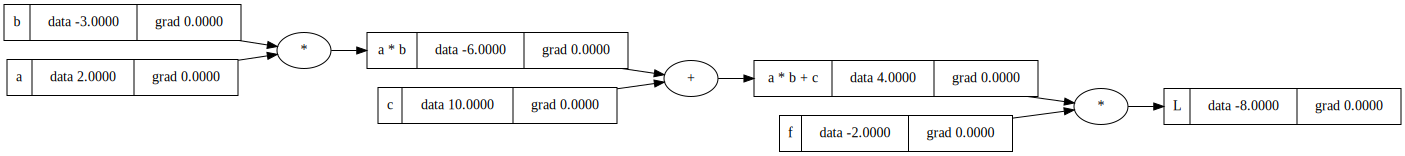

In [76]:
draw_dot(L)

In [ ]:
from micrograd.engine import Value
a = Value(-4.0)
b = Value(2.0)
c = a + b
d = a*b + b**3
